In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Answers are revealed by SDC3 team after the challenge!
This is a notebook to compare our results with the revealed truth.

ref. https://drive.google.com/drive/folders/1duJHKrZ8tEWlFNZ9ClOtTbzlSwSzBwol

# Contents
0. Read inputs including the true EoR lightcone
1. Cut frequency bins for the consistency with the MainData
2. Seperate 901 frequency bins into 6 as requested by SDC3 team
3. Measure Pk
4. See how the answers look like

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.cosmology import FlatLambdaCDM

In [3]:
#================= Define the path to the package
dir_path = '/path/to/KORSDC_FGremove/'
#================= Define the path to the package

In [4]:
import sys
sys.path.append(dir_path+"tools")
from tools import RA_DEC_fq 
from tools import pk_3D_to_2D 
from tools import DensityFlux_to_Temp 

## 0. Read inputs including the true EoR lightcone

In [5]:
filename = dir_path+'ancillary/bins_kper.txt'
kper = np.loadtxt(filename)

filename = dir_path+'ancillary/bins_kpar.txt'
kpar = np.loadtxt(filename)

filename = dir_path+'ancillary/TestDatasetTRUTH_166MHz-181MHz.data'
Truth = np.loadtxt(filename)

In [6]:
########## 'EoR_H21cm_v9.fits' is too large to be shared here,
########## so please find the intput via the link and download to the directory 'Answers_revealed'
# ref. https://drive.google.com/drive/folders/1duJHKrZ8tEWlFNZ9ClOtTbzlSwSzBwol
filename = dir_path+'Answers_revealed/EoR_H21cm_v9.fits'
print("Reading... ", filename)
fx = fits.open(filename)
print(fx.info())

Reading...  /home/minjioh/SDC3/Answers_revealed/EoR_H21cm_v9.fits
Filename: /home/minjioh/SDC3/Answers_revealed/EoR_H21cm_v9.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (512, 512, 936)   float32   
None


In [7]:
fx['PRIMARY'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
NAXIS3  =                  936                                                  
EXTEND  =                    T                                                  
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CTYPE3  = 'FREQ    '                                                            
CRVAL1  =                  0.0                                                  
CRVAL2  =                -30.0                                                  
CRVAL3  =          106000000

In [8]:
RA, DEC, fq = RA_DEC_fq(fx)

RA range      : -4.00 to 3.98
DEC range     : -33.98 to -26.00
redshift range: 6.12 to 12.40


# 1. Cut frequency bins for the consistency with the MainData

In [9]:
TEST = fq<196.1
fq = fq[TEST]
fq_min = np.where(TEST==True)[0][0]
fq_max = np.where(TEST==True)[0][-1]+1
print(fq.shape)

(901,)


In [10]:
RA = RA[:-1]
DEC = DEC[:-1]
Image = fx['PRIMARY'].data[fq_min:fq_max,:-1,:-1]
print(RA.shape)
print(DEC.shape)
print(Image.shape)

(511,)
(511,)
(901, 511, 511)


data shape to be plotted:  (511, 511)
min/max of the pixel values:  -0.20298262 0.039244756
mean= -0.09394111
std= 0.023766877
data shape to be plotted:  (511, 511)
min/max of the pixel values:  -0.072496064 0.019573407
mean= -0.022318207
std= 0.009645038
data shape to be plotted:  (511, 511)
min/max of the pixel values:  -0.0052853287 0.022510005
mean= 0.0052886577
std= 0.0037809885
data shape to be plotted:  (511, 511)
min/max of the pixel values:  -0.0070683705 0.028876312
mean= 0.011132372
std= 0.00599852
data shape to be plotted:  (511, 511)
min/max of the pixel values:  -0.007386074 0.031147946
mean= 0.010255704
std= 0.0074598584
data shape to be plotted:  (511, 511)
min/max of the pixel values:  -0.006964508 0.02579144
mean= 0.0055086548
std= 0.0065109995


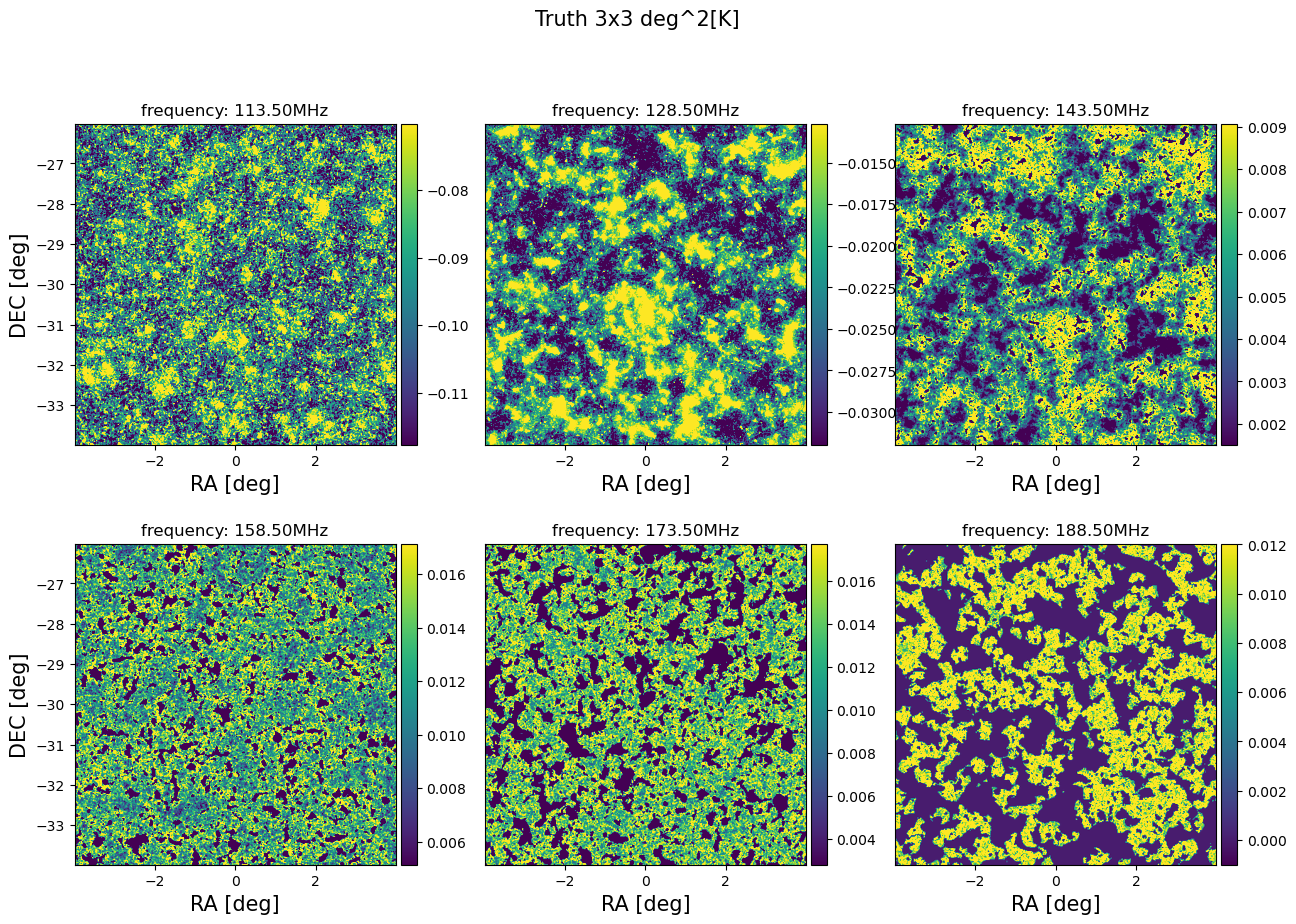

In [11]:
index_f_c = [0] * 6
index_f_c = np.array(index_f_c)

for i in range(6):
    index_f_c[i] = int(150*int(i) + int(150*0.5))
    
sample=index_f_c

plt.figure(figsize=(15,10))
ithf=0
plt.suptitle("Truth 3x3 deg^2[K]",fontsize=15)
for ithf in range(6):
    plt.subplot(2,3,1+ithf)
    plt.title("frequency: {:.2f}MHz".format(fq[sample][ithf]))

    ax = plt.gca()
    myMatrix =Image[sample][ithf]

    print("data shape to be plotted: ", myMatrix.shape)
    print("min/max of the pixel values: ",np.min(myMatrix), np.max(myMatrix))

    vmin=np.std(myMatrix)
    vmean=np.mean(myMatrix)
    print("mean=", vmean)
    print("std=", vmin)
    im = plt.imshow(myMatrix,extent=([min(RA), max(RA), min(DEC), max(DEC)]),vmin=vmean-vmin,vmax=vmean+vmin)
    plt.xlabel("RA [deg]",fontsize=15)
    if ithf==0 or ithf==3:
        plt.ylabel("DEC [deg]",fontsize=15)
    else:
        plt.yticks([])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im,cax=cax)

## 2. Seperate 901 frequency bins into 6 as requested by SDC3 team

In [12]:
filename = dir_path+'ancillary/bins_frequency.txt'
fmin, fmax = np.loadtxt(filename,skiprows=3,unpack=True)

In [13]:
f_slice = {}
fq_slice = {}
for j in range(6):
    if j !=5:
        TEST = (fq>=fmin[j]) & (fq<fmax[j])
    else:
        TEST = (fq>=fmin[j]) & (fq<=fmax[j])
    f_slice[j] = Image[TEST]
    fq_slice[j] = fq[TEST]

    print(f_slice[j].shape, fmin[j], fmax[j], np.mean(fq_slice[j]))

(150, 511, 511) 106.0 121.0 113.45
(150, 511, 511) 121.0 136.0 128.45
(150, 511, 511) 136.0 151.0 143.45
(150, 511, 511) 151.0 166.0 158.45
(150, 511, 511) 166.0 181.0 173.45
(151, 511, 511) 181.0 196.0 188.5


## 3. Measure Pk

In [14]:
pk2 = {}
nk2 = {}
for j in range(6):
    ft = np.fft.fftn(f_slice[j].astype('float64'))
    Tk = np.fft.fftshift(ft)
    del ft

    pk2[j], nk2[j] = pk_3D_to_2D(kper,Tk,RA,fq_slice[j])

(10,)
(150, 511, 511)
(511,)
(150,)
   936.602290580029  Mpc
   199.82596729377565  Mpc
(10,)
(150, 511, 511)
(511,)
(150,)
   909.5141692751058  Mpc
   187.744537697743  Mpc
(10,)
(150, 511, 511)
(511,)
(150,)
   883.9712141905966  Mpc
   177.59936589045537  Mpc
(10,)
(150, 511, 511)
(511,)
(150,)
   859.7388929711628  Mpc
   168.9171346697658  Mpc
(10,)
(150, 511, 511)
(511,)
(150,)
   836.6373662558657  Mpc
   161.37146310023945  Mpc
(10,)
(151, 511, 511)
(511,)
(151,)
   814.5252400210632  Mpc
   155.74684771415832  Mpc


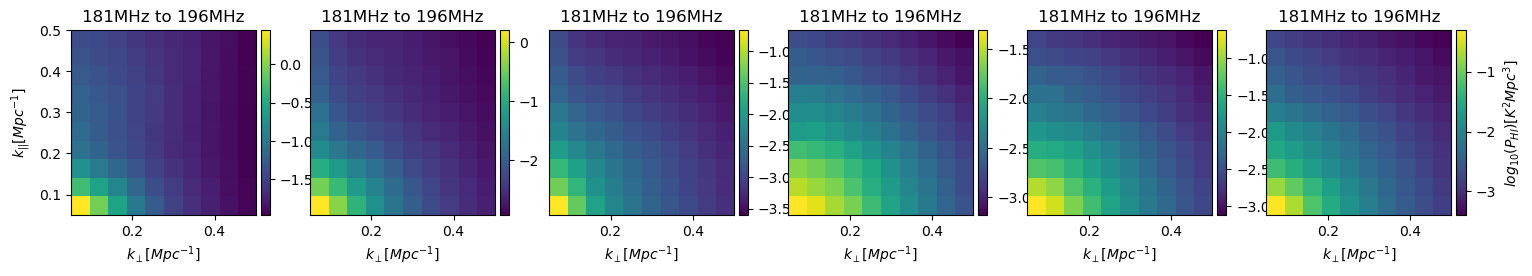

In [15]:
plt.figure(figsize=(18,7))

for j in range(6):
    plt.subplot(1,6,1+j)
    plt.title("{}MHz to {}MHz".format(int(fmin[i]),int(fmax[i])))
    ax = plt.gca()
    myMatrix =np.log10(pk2[j])
    im = plt.imshow(np.flip(myMatrix,0),extent=([min(kper), max(kper), min(kpar), max(kpar)]))
    if j==0:
        plt.ylabel(r"$k_{||} [Mpc^{-1}]$",fontsize=10)
    else:
        plt.yticks([])
    plt.xlabel(r"$k_{\perp} [Mpc^{-1}]$",fontsize=10)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im,cax=cax)
    if j==5:
        cbar.set_label(r"$log_{10}(P_{HI}) [K^{2}Mpc^{3}]$",fontsize=10)
plt.savefig(dir_path+'plots/pk_by_ourselves_from_truth_EOR.png')

## 4. See how the answers look like

In [16]:
pk = {}
for i in range(len(fmin)):
    filename = dir_path + 'Answers_revealed/Power_spectra/Truth_{}MHz-{}MHz.data'.format(int(fmin[i]),int(fmax[i]))
    pk[i] = np.loadtxt(filename,skiprows=3)

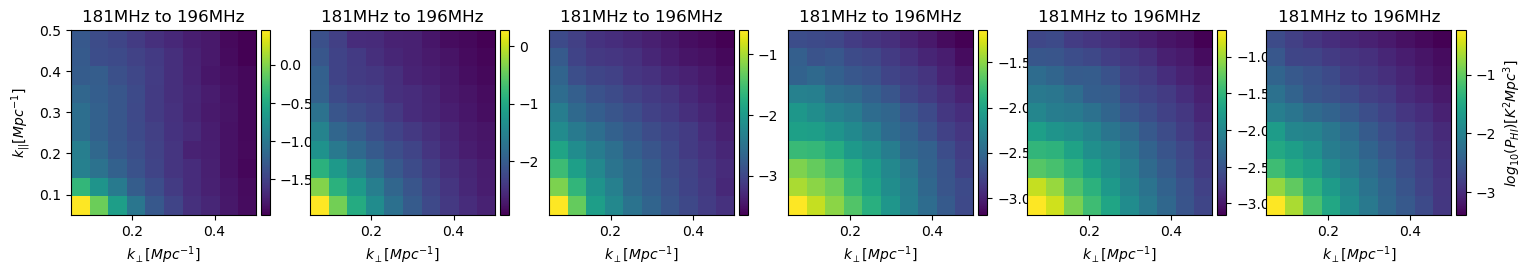

In [17]:
plt.figure(figsize=(18,7))

for j in range(6):
    plt.subplot(1,6,1+j)
    plt.title("{}MHz to {}MHz".format(int(fmin[i]),int(fmax[i])))
    ax = plt.gca()
    myMatrix =np.log10(pk[j])
    im = plt.imshow(np.flip(myMatrix,0),extent=([min(kper), max(kper), min(kpar), max(kpar)]))
    if j==0:
        plt.ylabel(r"$k_{||} [Mpc^{-1}]$",fontsize=10)
    else:
        plt.yticks([])
    plt.xlabel(r"$k_{\perp} [Mpc^{-1}]$",fontsize=10)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im,cax=cax)
    if j==5:
        cbar.set_label(r"$log_{10}(P_{HI}) [K^{2}Mpc^{3}]$",fontsize=10)
plt.savefig(dir_path+'plots/pk_provided_answers.png')

# The end.